In [ ]:
import mikeio

In [ ]:
filename = "../tests/testdata/HD2D.dfsu"
ds = mikeio.read(filename)
ds

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: U velocity <u velocity component> (meter per sec)
 2: V velocity <v velocity component> (meter per sec)
 3: Current speed <Current Speed> (meter per sec)

In [ ]:
ds_1 = mikeio.read(filename, items=['Surface elevation', 'Current speed'])
ds_1

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: Current speed <Current Speed> (meter per sec)

In [ ]:
ds_1.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Surface elevation</th>
      <th>Current speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>7956.000000</td>
      <td>7956.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.034152</td>
      <td>0.073658</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.534890</td>
      <td>0.119606</td>
    </tr>
    <tr>
      <th>min</th>
      <td>-0.758378</td>
      <td>0.000082</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>-0.579662</td>
      <td>0.029917</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.101636</td>
      <td>0.046848</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.462013</td>
      <td>0.070259</td>
    </tr>
    <tr>
      <th>max</th>
      <td>1.172707</td>
      <td>1.714988</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
ds_1.sel(x=606200, y=6905480)

<mikeio.Dataset>
dims: (time:9)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: GeometryPoint2D(x=606202.7806372638, y=6905474.639383219)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: Current speed <Current Speed> (meter per sec)

In [ ]:
ds_1.interp(x=606200, y=6905480)

<mikeio.Dataset>
dims: (time:9)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: GeometryPoint2D(x=606200, y=6905480)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: Current speed <Current Speed> (meter per sec)

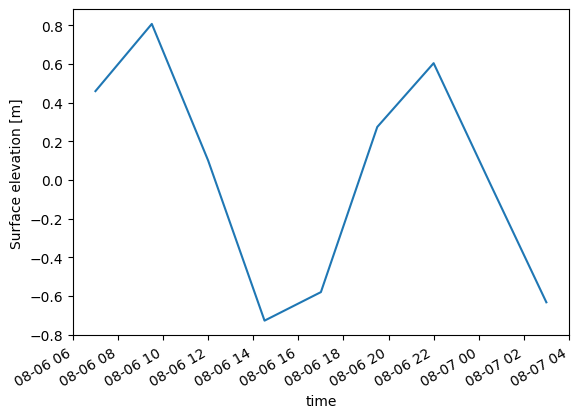

In [ ]:
ds_1.interp(x=606200, y=6905480).Surface_elevation.plot()

In [ ]:
df = ds_1.sel(x=606200, y=6905480).to_dataframe()
df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Surface elevation</th>
      <th>Current speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1985-08-06 07:00:00</th>
      <td>0.459460</td>
      <td>0.009572</td>
    </tr>
    <tr>
      <th>1985-08-06 09:30:00</th>
      <td>0.806965</td>
      <td>0.011064</td>
    </tr>
    <tr>
      <th>1985-08-06 12:00:00</th>
      <td>0.100285</td>
      <td>0.017169</td>
    </tr>
    <tr>
      <th>1985-08-06 14:30:00</th>
      <td>-0.727009</td>
      <td>0.014452</td>
    </tr>
    <tr>
      <th>1985-08-06 17:00:00</th>
      <td>-0.579541</td>
      <td>0.007349</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
df.plot();

In [ ]:
pt1 = (606200, 6905480)
pt2 = (606300, 6905410)
pt3 = (606400, 6905520)
pts_x = [pt1[0], pt2[0], pt3[0]]
pts_y = [pt1[1], pt2[1], pt3[1]]
elem_ids = ds_1.geometry.find_index(pts_x, pts_y)

In [ ]:
ds_pts = mikeio.read(filename, elements=elem_ids)
ds_pts

<mikeio.Dataset>
dims: (time:9, element:3)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (3 elements, 7 nodes)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: U velocity <u velocity component> (meter per sec)
 2: V velocity <v velocity component> (meter per sec)
 3: Current speed <Current Speed> (meter per sec)

In [ ]:
ds_2 = mikeio.read('../tests/testdata/HD2D.dfsu')
ds_2

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: U velocity <u velocity component> (meter per sec)
 2: V velocity <v velocity component> (meter per sec)
 3: Current speed <Current Speed> (meter per sec)

In [ ]:
outfilename2 = 'HD2D_selected.dfsu'
newds = ds_2[['U velocity', 'V velocity']].rename({'U velocity': 'eastward_sea_water_velocity', 'V velocity': 'northward_sea_water_velocity'})
newds

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
 0: eastward_sea_water_velocity <u velocity component> (meter per sec)
 1: northward_sea_water_velocity <v velocity component> (meter per sec)

In [ ]:
newds.to_dfs(outfilename2)

In [ ]:
newds2 = mikeio.read(outfilename2)
newds2

<mikeio.Dataset>
dims: (time:9, element:884)
time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
geometry: Dfsu2D (884 elements, 529 nodes)
items:
 0: eastward_sea_water_velocity <u velocity component> (meter per sec)
 1: northward_sea_water_velocity <v velocity component> (meter per sec)

In [ ]:
outmesh = 'mesh_from_HD2D.mesh'
ds_2.geometry.to_mesh(outmesh)

In [ ]:
import os
os.remove(outfilename2)
os.remove(outmesh)

In [ ]:
import marimo as mo

# Dfsu - Read

Filter in space to the element at our POI, (discrete values, no interpolation)

Interpolate in space to the location of our POI

Convert to a dataframe.

## Other ways to subset data

Assume that we interested in these 3 points only

We can use these element ids either when we select the data from the complete dataset using the method isel() as shown above or already when we read the data from file (particular useful for files larger than memory)

# Create a new dfsu file

* Subset of items
* Renamed variables

First inspect the source file:

Read the newly created file to verify the contents.

# Write mesh from dfsu file
Don't you have the original mesh? No problem - you can re-create it from the dfsu file...

# Clean up